In [29]:
.........................................

Linear Regression

.........................................

In [ ]:
import numpy as np
from math import *
import matplotlib.pyplot as plt


In [30]:
#pwd
import pandas as pd
data_file=pd.read_csv('salary_data.csv')
print(data_file)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [31]:
x=data_file.YearsExperience;
y=data_file.Salary;

print(x)
print(y)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64
0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [32]:
def line_equ(x,m,c):
    h_y=[]
    for i in x:
        a=m*i+c;
        h_y.append(a)
    return h_y


In [33]:
def error_dm(x,y,h_y):
    a=0
    for i,j,k in zip(x,y,h_y):
        a+=(i*(j-k)) 
    ans=((2*a)*(-1))/len(x);
    return ans
        

In [34]:
def error_dc(y,h_y):
    a=0
    for i,j in zip(y,h_y):
        a+=(i-j)
    ans=((2*a)*(-1))/len(y); 
    return ans

In [35]:
def error_fun(y,h_y): 
    a=0
    for i,j in zip(y,h_y):
        a+=((i-j)**2)
    ans=((a))/len(y); 
    return ans

In [36]:
def learning_fun(x,y):
    m=0
    c=0
    l=0.0001
    loop=3000
    for i in range(0,loop):
        new_line_equ=line_equ(x,m,c) 
        new_dm=error_dm(x,y,new_line_equ)
        new_dc=error_dc(y,new_line_equ)
        m=m-(l*new_dm)
        c=c-(l*new_dc)
        error=error_fun(y,new_line_equ)
    return [m,c],error


In [37]:
ans,error=learning_fun(x,y)
print(ans,error)

[12569.224052096484, 4772.323277270303] 126795682.4840192


In [40]:
def linear_re(x,y):
    list_mc,e=learning_fun(x,y)
    final_line_equ=line_equ(x,list_mc[0],list_mc[1])
    plt.scatter(x,y) 
    plt.scatter(x, final_line_equ, color='red')
    plt.plot(x, final_line_equ, color='red')
    plt.show()

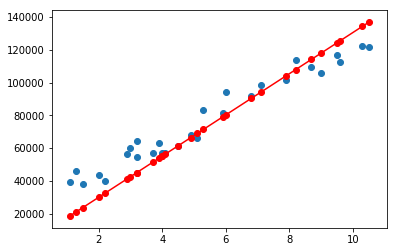

In [41]:
linear_re(x,y)

In [ ]:
.........................................


K-Nearest Neighbors(KNN)_iris_data

.........................................

In [43]:
import numpy as np
from math import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
from collections import Counter

iris = datasets.load_iris() 
x = iris.data
y = iris.target
test_list=[5.1,3.0,4.2,1.5]
k=3
print(x)
print(y)
print(len(x))
print(len(y))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [44]:
dt={}
kk=0
for i in range(0,len(x)):
    s=0;
    for j in range(0,len(x[i])):
        s=s+(((x[i][j])-test_list[j])**2)
    rt=sqrt(s);
    dt[rt]=y[kk]
    kk=kk+1
print (dt)

{3.1272991542223783: 0, 3.093541659651604: 0, 3.2093613071762426: 0, 3.0397368307141326: 0, 3.146426544510455: 0, 2.891366458960192: 0, 3.1128764832546763: 0, 3.024896692450835: 0, 3.167017524422623: 0, 3.0495901363953815: 0, 3.0919249667480617: 0, 2.9495762407505253: 0, 3.144837038703278: 0, 3.4942810419312296: 0, 3.4899856733230297: 0, 3.289376840679706: 0, 3.2434549480453714: 0, 3.0870698080866266: 0, 2.947880594596735: 0, 3.0610455730027937: 0, 2.8618176042508368: 0, 2.99833287011299: 0, 3.5411862419251547: 0, 2.7092434368288134: 0, 2.6888659319497505: 0, 2.9086079144497976: 0, 2.8530685235374214: 0, 3.1144823004794877: 0, 2.9410882339705484: 0, 2.924038303442689: 0, 2.9580398915498085: 0, 3.235737937472687: 0, 3.336165463522456: 0, 3.004995840263344: 0, 3.277193921634788: 0, 3.241913015489466: 0, 3.1937438845342627: 0, 3.254228019054596: 0, 3.023243291566195: 0, 3.1796226191169294: 0, 3.2710854467592254: 0, 3.2603680773802215: 0, 2.7982137159266447: 0, 2.6720778431774774: 0, 3.014

In [45]:
dt2={}
for i in sorted(dt):
    dt2[i]=dt[i]
print(dt2)
l1=l2=l3=ma=0
for i in dt2.values():
    if(i==0):
        l1+=1
    if(i==1):
        l2+=1
    if(i==2):
        l3+=1
    k=k-1;
    if(k==0):
        break
print ("output :",0,"->",l1," ",1,"->",l2," ",2,"->",l3)
print("ans_y: ",end="")
ma=max(l1,max(l2,l3))
if(l1==ma):
    print(0)
elif (l2==ma):
    print(1)
else:
    print(2)

{0.4242640687119289: 1, 0.44721359549995815: 1, 0.5477225575051662: 1, 0.58309518948453: 1, 0.6164414002968975: 1, 0.6403124237432853: 1, 0.6480740698407857: 2, 0.6708203932499371: 1, 0.6708203932499374: 1, 0.6708203932499376: 1, 0.7000000000000002: 1, 0.7280109889280523: 1, 0.8000000000000007: 1, 0.8124038404635961: 1, 0.8544003745317535: 1, 0.8660254037844387: 1, 0.871779788708135: 1, 0.8831760866327848: 1, 0.9165151389911682: 1, 0.9165151389911683: 1, 0.9539392014169459: 1, 1.009950493836208: 1, 1.0148891565092222: 2, 1.0344080432788603: 1, 1.0583005244258363: 1, 1.0630145812734653: 1, 1.0816653826391966: 1, 1.1224972160321824: 2, 1.1224972160321829: 1, 1.1269427669584644: 1, 1.126942766958465: 1, 1.174734012447073: 1, 1.2083045973594573: 1, 1.2247448713915892: 2, 1.2409673645990857: 2, 1.244989959798873: 2, 1.24899959967968: 1, 1.2569805089976536: 2, 1.30384048104053: 2, 1.3114877048604: 1, 1.319090595827292: 1, 1.3228756555322954: 1, 1.322875655532296: 1, 1.3379088160259653: 1, 1.

In [ ]:
.........................................

Naive bayes(laplace smoothig)

.........................................

In [48]:
import numpy as np
from math import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
from collections import Counter
     
spam=["আমরা ঈদে বাড়ি যাবো না",
     "করিম বাড়ি যাবে না",
     "করিম গান শুনতে পছন্দ করে না",
     "আজকে আমরা হারবো",
     "সে আজকে আসবে না",
    "স্যার রোবট ভালোবাসেন না",
     "সে খারাপ গান গায়",
     "কেউ তাদের পছন্দ করে না",
     "আমি ভ্রমণ পছন্দ করি না ",
     "ভ্রমণ করা খুব খারাপ",
     "আমরা কেউ ভ্রমণে যাই না",
     "রোবট খারাপ গান করে",
     "সে স্কুলে পড়া পারে না ",
     "স্যারের হাসি সুন্দর না",
     "আমাদের ডিপার্ট্মেন্ট খারাপ",
     "সে স্কুল যায় না ",
     "আমি রোবট পছন্দ করি না",
      "সেদিন ক্লাস হয় নাই",
     "আমরা কেউ ভ্রমণে যাই না",
     "আমি তাকে পছন্দ করি না",
     "তারা খারাপ  বন্ধু",
     "সে খারাপ ছাত্র",
     "আমরা খেলায় যাই না"
     "আমাদের ডিপার্ট্মেন্ট খেলায় খুব খারাপ ",
     "রোবট নিজে নিজে কথা বলতে পারে না",
     "রোবট তৈরি করা খারাপ",
     "সে আমাকে মেরেছে",
     "ক্লাসে কেউ নাই",
     "বাংলাদেশ সুন্দর না",
     "আমি দেশকে ভালোবাসি না",
    "স্যারের রোবট খারাপ কথা বলতে পারে",
     "তারা ছবি দেখতে পছন্দ করে না",
     "আমরা সবাই ছবি দেখি না",
     "দেশ সকল খারাপ",
     "দেশ মায়ের সমান না",
     "কাউকে সম্মান করবো না",
     "তারা সবাই খুব খারাপ",
     "ঈদে বাড়ি যাব না",
     "পাখি দেখতে সুন্দর না",
     "ছবিটি অনেক খারাপ",
     "আমরা পারবো খারাপ রোবট তৈরি করতে"
     "পাখি গান গায় না",
     "পাখি কথা বলে না",
     "আমি পাখি পছন্দ করি না",
     "পাখি আকাশে উড়তে পারে না",
     "পাখির বাচ্চা দেখতে খুব সুন্দর না",]

ham=["আমি ভ্রমণ পছন্দ করি",
     "ভ্রমণ করা খুব আনন্দের",
     "আমরা সবাই ভ্রমণে যাই",
     "আমি তাকে খুব পছন্দ করি",
     "সে আমাকে জানে ভালো করে",
    "পাখি গান গায়",
     "পাখি কথা বলে",
     "আমি পাখি পছন্দ করি",
     "পাখি আকাশে উড়তে পারে",
     "পাখির বাচ্চা দেখতে খুব সুন্দর",
     "স্যারের রোবট কথা বলতে পারে",
     "তারা ছবি দেখতে পছন্দ করে",
     "আমরা সবাই ছবি দেখি",
     "ছবিটি অনেক সুন্দর",
    "স্যারের হাসি খুব সুন্দর",
     "আমাদের ডিপার্ট্মেন্ট ভালো",
     "সে স্কুল যায়",
     "আমি রোবট পছন্দ করি",
     "তারা ভালো বন্ধু",
     "সে ভালো ছাত্র",
     "স্যার রোবট ভালোবাসেন",
     "সে গান গায়",
    "আমি ভালো আছি",
     "আমি যাচ্ছি সেখানে",
     "সকল শিক্ষক খুব ভালো",
     "রোবট কথা বলে",
     "রোবট খুব ভালো",
     "রোবট গান করে",
     "সে স্কুলে পড়া পারে",
     "সবাই তাদের পছন্দ করে",
     "আমরা খেলায় যাই"
     "আমাদের ডিপার্ট্মেন্ট খেলায় খুব ভালো",
     "করিম গান শুনতে পছন্দ করে",
     "আজ আমরা জিতব ",
     "সে আজকে আসবে ",
     "আমরা পারবো রোবট তৈরি করতে"
     "রোবট নিজে নিজে কথা বলতে পারে",
     "রোবট তৈরি করা সহজ",
     "সেদিন ক্লাস হয়েছে",
     "ক্লাসে সবাই আছে",
     "বাংলাদেশ সুন্দর",
     "বাংলাদেশ সুন্দর",
     "আমি দেশকে ভালোবাসি",
     "দেশ সকলের মা",
     "দেশ মায়ের সমান",
     "সবাই কে সম্মান করবো",
     "তারা সবাই খুব ভালো",
     "ঈদে বাড়ি যাবো",
     "পাখি দেখতে সুন্দর",
     "আমরা ঈদে বাড়ি যাবো",
     "করিম বাড়ি যাবে",]

spam_len=len(spam)
ham_len=len(ham)
c=spam.copy()
c.extend(ham)
total_len=len(c)
print(spam_len,ham_len,total_len)


44 49 93


In [49]:
total={}
spam_c={}
ham_c={}

for i in spam:
    for j in i.split(' '):
            if j in spam_c:
                spam_c[j]+=1
            else:
                spam_c[j]=1

for i in ham:
    for j in i.split(' '):
            if j in ham_c:
                ham_c[j]+=1
            else:
                ham_c[j]=1


for i in c:
    for j in i.split(' '):
            if j in total:
                total[j]+=1
            else:
                total[j]=1
            
print(total,"\n")
print(spam_c)
print(ham_c)

total_sum=sum(total.values())
spam_sum=sum(spam_c.values())
ham_sum=sum(ham_c.values())
print(total_sum,spam_sum,ham_sum)

{'আমরা': 13, 'ঈদে': 4, 'বাড়ি': 6, 'যাবো': 3, 'না': 28, 'করিম': 4, 'যাবে': 2, 'গান': 8, 'শুনতে': 2, 'পছন্দ': 14, 'করে': 9, 'আজকে': 3, 'হারবো': 1, 'সে': 12, 'আসবে': 2, 'স্যার': 2, 'রোবট': 15, 'ভালোবাসেন': 2, 'খারাপ': 13, 'গায়': 4, 'কেউ': 4, 'তাদের': 2, 'আমি': 12, 'ভ্রমণ': 4, 'করি': 8, '': 7, 'করা': 4, 'খুব': 12, 'ভ্রমণে': 3, 'যাই': 4, 'স্কুলে': 2, 'পড়া': 2, 'পারে': 8, 'স্যারের': 4, 'হাসি': 2, 'সুন্দর': 10, 'আমাদের': 2, 'ডিপার্ট্মেন্ট': 4, 'স্কুল': 2, 'যায়': 2, 'সেদিন': 2, 'ক্লাস': 2, 'হয়': 1, 'নাই': 2, 'তাকে': 2, 'তারা': 6, 'বন্ধু': 2, 'ছাত্র': 2, 'খেলায়': 4, 'নাআমাদের': 1, 'নিজে': 4, 'কথা': 7, 'বলতে': 4, 'তৈরি': 4, 'আমাকে': 2, 'মেরেছে': 1, 'ক্লাসে': 2, 'বাংলাদেশ': 3, 'দেশকে': 2, 'ভালোবাসি': 2, 'ছবি': 4, 'দেখতে': 6, 'সবাই': 8, 'দেখি': 2, 'দেশ': 4, 'সকল': 2, 'মায়ের': 2, 'সমান': 2, 'কাউকে': 1, 'সম্মান': 2, 'করবো': 2, 'যাব': 1, 'পাখি': 9, 'ছবিটি': 2, 'অনেক': 2, 'পারবো': 2, 'করতেপাখি': 1, 'বলে': 3, 'আকাশে': 2, 'উড়তে': 2, 'পাখির': 2, 'বাচ্চা': 2, 'আনন্দের': 1, 'জানে': 1, 'ভালো': 9, 'আছি': 1, 

In [50]:
p_spam=spam_len/total_len
p_ham=ham_len/total_len
print(p_spam,p_ham,"\n")

0.4731182795698925 0.5268817204301075 



In [51]:
total_probability={}
spam_probability={}
ham_probability={}

for i,j in total.items():
    total_probability[i]=(j+1)/(total_sum+2)

print(total_probability,"\n")


{'আমরা': 0.035897435897435895, 'ঈদে': 0.01282051282051282, 'বাড়ি': 0.017948717948717947, 'যাবো': 0.010256410256410256, 'না': 0.07435897435897436, 'করিম': 0.01282051282051282, 'যাবে': 0.007692307692307693, 'গান': 0.023076923076923078, 'শুনতে': 0.007692307692307693, 'পছন্দ': 0.038461538461538464, 'করে': 0.02564102564102564, 'আজকে': 0.010256410256410256, 'হারবো': 0.005128205128205128, 'সে': 0.03333333333333333, 'আসবে': 0.007692307692307693, 'স্যার': 0.007692307692307693, 'রোবট': 0.041025641025641026, 'ভালোবাসেন': 0.007692307692307693, 'খারাপ': 0.035897435897435895, 'গায়': 0.01282051282051282, 'কেউ': 0.01282051282051282, 'তাদের': 0.007692307692307693, 'আমি': 0.03333333333333333, 'ভ্রমণ': 0.01282051282051282, 'করি': 0.023076923076923078, '': 0.020512820512820513, 'করা': 0.01282051282051282, 'খুব': 0.03333333333333333, 'ভ্রমণে': 0.010256410256410256, 'যাই': 0.01282051282051282, 'স্কুলে': 0.007692307692307693, 'পড়া': 0.007692307692307693, 'পারে': 0.023076923076923078, 'স্যারের': 0.01282051282

In [52]:
for i,j in spam_c.items():
    spam_probability[i]=(j+1)/(spam_sum+2)

print(spam_probability,"\n")

{'আমরা': 0.03902439024390244, 'ঈদে': 0.014634146341463415, 'বাড়ি': 0.01951219512195122, 'যাবো': 0.00975609756097561, 'না': 0.14146341463414633, 'করিম': 0.014634146341463415, 'যাবে': 0.00975609756097561, 'গান': 0.024390243902439025, 'শুনতে': 0.00975609756097561, 'পছন্দ': 0.03902439024390244, 'করে': 0.024390243902439025, 'আজকে': 0.014634146341463415, 'হারবো': 0.00975609756097561, 'সে': 0.03414634146341464, 'আসবে': 0.00975609756097561, 'স্যার': 0.00975609756097561, 'রোবট': 0.03902439024390244, 'ভালোবাসেন': 0.00975609756097561, 'খারাপ': 0.06829268292682927, 'গায়': 0.014634146341463415, 'কেউ': 0.024390243902439025, 'তাদের': 0.00975609756097561, 'আমি': 0.02926829268292683, 'ভ্রমণ': 0.014634146341463415, 'করি': 0.024390243902439025, '': 0.02926829268292683, 'করা': 0.014634146341463415, 'খুব': 0.024390243902439025, 'ভ্রমণে': 0.014634146341463415, 'যাই': 0.01951219512195122, 'স্কুলে': 0.00975609756097561, 'পড়া': 0.00975609756097561, 'পারে': 0.024390243902439025, 'স্যারের': 0.014634146341463415,

In [53]:
for i,j in ham_c.items():
    ham_probability[i]=(j+1)/(ham_sum+2)

print(ham_probability,"\n")

{'আমি': 0.0427807486631016, 'ভ্রমণ': 0.016042780748663103, 'পছন্দ': 0.0427807486631016, 'করি': 0.026737967914438502, 'করা': 0.016042780748663103, 'খুব': 0.0481283422459893, 'আনন্দের': 0.0106951871657754, 'আমরা': 0.0374331550802139, 'সবাই': 0.0374331550802139, 'ভ্রমণে': 0.0106951871657754, 'যাই': 0.0106951871657754, 'তাকে': 0.0106951871657754, 'সে': 0.0374331550802139, 'আমাকে': 0.0106951871657754, 'জানে': 0.0106951871657754, 'ভালো': 0.053475935828877004, 'করে': 0.03208556149732621, 'পাখি': 0.03208556149732621, 'গান': 0.026737967914438502, 'গায়': 0.016042780748663103, 'কথা': 0.026737967914438502, 'বলে': 0.016042780748663103, 'আকাশে': 0.0106951871657754, 'উড়তে': 0.0106951871657754, 'পারে': 0.026737967914438502, 'পাখির': 0.0106951871657754, 'বাচ্চা': 0.0106951871657754, 'দেখতে': 0.0213903743315508, 'সুন্দর': 0.0374331550802139, 'স্যারের': 0.016042780748663103, 'রোবট': 0.0481283422459893, 'বলতে': 0.016042780748663103, 'তারা': 0.0213903743315508, 'ছবি': 0.016042780748663103, 'দেখি': 0.010695

In [54]:
Q='সে ভাল রোবট না'

In [55]:
spam_p_up=1
spam_p_down=1
for i in Q.split(' '):
    if i in spam_probability:
        spam_p_up*=spam_probability[i]
        spam_p_down*=total_probability[i]
    else:
        spam_p_up*=(1/(spam_sum+2));
        spam_p_down*=(1/(total_sum+2));
spam_p_up*=p_spam
spam_p_ans=spam_p_up/spam_p_down;
print("spam-> ",spam_p_ans,"\n")

spam->  1.668543002021574 



In [56]:


ham_p_up=1
ham_p_down=1
for i in Q.split(' '):
    if i in ham_probability:
        ham_p_up*=ham_probability[i]
        ham_p_down*=total_probability[i]
    else:
        ham_p_up*=(1/(ham_sum+2));
        ham_p_down*=(1/(total_sum+2));
ham_p_up*=p_ham
ham_p_ans=ham_p_up/ham_p_down;
print("ham-> ",ham_p_ans,"\n")


ham->  3.019133714468988 



In [57]:
sp=((spam_p_ans/(ham_p_ans+spam_p_ans))*100);
hm=((ham_p_ans/(ham_p_ans+spam_p_ans))*100);
print(sp,"%","\n")
print(hm,"%","\n")

35.594242157354486 % 

64.40575784264551 % 



In [58]:
if(sp>=hm):
    print("this sentence is Spam : ",end="")
    print(round(sp),"%","\n")
elif(hm>sp):
    print("this sentence is Ham : ",end="")
    print(round(hm),"%","\n")

this sentence is Ham : 64 % 



In [ ]:
.........................................

Perceptron

.........................................

In [59]:
import numpy as np
import matplotlib.pyplot as plt
x=[
   [1,8,7],
   [1,4,10],
   [1,9,7],
   [1,7,10],
   [1,9,6],
   [1,4,8],
   [1,10,10],
   [1,2,7],
   [1,8,3],
   [1,7,5],
   [1,4,4],
   [1,4,6],
   [1,1,3],
   [1,2,5]
  ]
print(len(x))
y=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]
print(len(y))
x=np.array(x)
y=np.array(y)

14
14


In [60]:
def linear_regression(k,h):
    val=0
    for i,j in zip(k,h):  
        val=val+(i*j)
    return val

def activate(val):
    return np.sign(val)


def predict(x,w):
    hp=[]
    for i in x: 
        lr=linear_regression(i,w)
        h=activate(lr)
        hp.append(h)
    return hp

In [61]:
def miss_class(py, y):
    miss=[]
    for i in range(len(y)):
        if py[i]!=y[i]:
            miss.append(i)
    return miss

In [62]:
def perceptron(x, y):
    w = np.random.rand(3)
    p_value=predict(x,w)     
    miss=miss_class(p_value,y)
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=x[rnd]
        ry=y[rnd]
        w=w+(rx*ry)
        p_value=predict(x,w)
        miss=miss_class(p_value,y)
    return w

In [63]:
w=perceptron(x,y)
w=np.array(w)
print(w)

[-61.50442804   3.16165831   7.60146961]


In [64]:
pp=predict(x,w)
print(pp)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [65]:
def accuracy(y,new_y):
        count=0
        for i,j in zip(y,new_y):
                if(i==j):
                    count+=1
        if(len(y)!=0):
            #print('old_y :',y)
            count=count/len(y)
            print('accuracy=  ',count*100,'%')

In [66]:
accuracy(y,pp)

accuracy=   100.0 %


In [ ]:
.........................................

K Means Clustering

.........................................

In [132]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
x = [
    [12,39],
    [20,36],
    [28,30],
    [18,52],
    [29,54],
    [33,46],
    [24,55],
    [45,59],
    [45,63],
    [52,70],
    [51,66],
    [52,63],
    [55,58],
    [53,23],
    [55,14],
    [61,8],
    [64,19],
    [69,7],
    [72,24],
]
X = np.array(x)

In [134]:
def get_random_centroids(k):
    centroids={}
    while True:
        ri=np.random.choice(range(len(X)), k)
        print(ri)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                centroids[i]=X[ri[i]]
            break

    return centroids

In [135]:
k = 3
centroids=get_random_centroids(k)
print(centroids)
c1=centroids[0]
c2=centroids[1]
c3=centroids[2]

[12  7 18]
{0: array([55, 58]), 1: array([45, 59]), 2: array([72, 24])}


In [136]:
def euclidianDistance(arr,c):
    return np.sqrt( ((arr[0]-c[0])*(arr[0]-c[0]))+((arr[1]-c[1])*(arr[1]-c[1])) )

In [137]:
def grouping(X):
    g1 = []
    g2 = []
    g3 = []
    sz = len(X)
    #print(sz)
    for i in range(sz):
        data = X[i]
        mn1 = euclidianDistance(data,c1)
        mn2 = euclidianDistance(data,c2)
        mn3 = euclidianDistance(data,c3)
        if mn1<mn2 and mn1<mn3:
            g1.append(data)
        elif mn2<mn1 and mn2<mn3:
            g2.append(data)
        else:
            g3.append(data)
    return g1,g2,g3

In [138]:
def average(grp):
    #GRP = np.array(grp)
    sz = len(grp)
    left=0
    right=0
    #print(sz)
    for i in range(sz):
        t = grp[i] 
        left+=t[0]
        right+=t[1]
    c = [left/sz,right/sz]
    return c

In [139]:
while(1):
    g1,g2,g3 = grouping(x)
    c1 = average(g1)
    c2 = average(g2)
    c3 = average(g3)
    
    g1,g2,g3 = grouping(x)
    c11 = average(g1)
    c22 = average(g2)
    c33 = average(g3)
    
    if c1==c11 and c2==c22 and c3==c33:
        break
print(c1)
print(c2)
print(c3)

[50.0, 63.166666666666664]
[23.428571428571427, 44.57142857142857]
[62.333333333333336, 15.833333333333334]


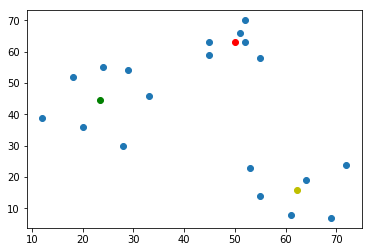

In [140]:
plt.scatter(X[:,0],X[:,1],marker='o' )
colmap = {0: 'r', 1: 'g', 2: 'y', 3:'b'}
plt.scatter(c1[0], c1[1], color=colmap[0])
plt.scatter(c2[0], c2[1], color=colmap[1])
plt.scatter(c3[0], c3[1], color=colmap[2])
plt.show()

In [ ]:
.........................................

Binary Logistic Regression

.........................................

In [149]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

x=[[1,8,7],[1,2,5],[1,3,10],[1,4,4],[1,5,5],[1,9,7]]
y=[0, 0, 0, 1, 1, 1]
theta=[-1,7,-4]

print(x)
print(y)

[[1, 8, 7], [1, 2, 5], [1, 3, 10], [1, 4, 4], [1, 5, 5], [1, 9, 7]]
[0, 0, 0, 1, 1, 1]


In [150]:
def dot_product(a,b):
    test_list=np.dot(a,b)
    return test_list

dot_p=dot_product(x,theta)
print(dot_p)

[ 27  -7 -20  11  14  34]


In [151]:
def hypothesis_fun(dot_p):
    test_list=[]
    for i in dot_p:
        variable=(1/(1+np.exp(-i)))
        test_list.append(variable)
    return test_list;

hypothesis_list=hypothesis_fun(dot_p);
print(hypothesis_list)

[0.9999999999981204, 0.0009110511944006454, 2.0611536181902037e-09, 0.999983298578152, 0.9999991684719722, 0.9999999999999982]


In [152]:
def update_theta_fun(x,y,hypothesis_list):
    v1=v2=v3=0
    d=[]
    for i,j,k in zip(x,y,hypothesis_list):
        v1+=(i[0]*(j-k))
        v2+=(i[1]*(j-k))
        v3+=(i[2]*(j-k))
    d0=-1*(v1/len(x))
    d1=-1*(v2/len(x))
    d2=-1*(v3/len(x))
    d.append(d0)
    d.append(d1)
    d.append(d2)
    return d;
update_theta=update_theta_fun(x,y,hypothesis_list);
print(update_theta)

[0.16681558671729954, 1.3336251908716135, 1.16741405220714]


In [153]:
def learning_fun(x):
    theta=[0,0,0]
    learning_value =0.1
    for i in range(0,5000):
        new_dot_p=dot_product(x,theta)
        new_hypothesis_list=hypothesis_fun(new_dot_p)
        new_theta=update_theta_fun(x,y,new_hypothesis_list)
        theta[0]=theta[0]-(new_theta[0]*learning_value)
        theta[1]=theta[1]-(new_theta[1]*learning_value)
        theta[2]=theta[2]-(new_theta[2]*learning_value)
    return theta;
learning_theta=learning_fun(x)
print(learning_theta)

[10.958810465617592, 2.02826402257509, -3.9639914807469627]


In [154]:
def check_y(y1):
    if(y1>=0.5):
        print(1)
    else:
        print(0)

In [155]:
def accuracy_y(x,learning_theta):
    final_dot_p=dot_product(x,learning_theta)
    final_hypothesis_list=hypothesis_fun(final_dot_p)
    for i in final_hypothesis_list:
            check_y(i)

In [156]:
x=[[1,3,3]];
final_dot_p=dot_product(x,learning_theta)
final_hypothesis_list=hypothesis_fun(final_dot_p)
for i in final_hypothesis_list:
         check_y(i)


1


In [168]:
.........................................

PCA-with-Toy-Data

.........................................

In [158]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
x=np.array([[14,5],[16,5],[6,0],[10,1],[8,2],[15,6],[15,7],[8,2],[8,1],[15,4]])

In [160]:
x_avg=x.mean(axis=0)
new_x=x-x_avg
print(new_x)

[[ 2.5  1.7]
 [ 4.5  1.7]
 [-5.5 -3.3]
 [-1.5 -2.3]
 [-3.5 -1.3]
 [ 3.5  2.7]
 [ 3.5  3.7]
 [-3.5 -1.3]
 [-3.5 -2.3]
 [ 3.5  0.7]]


In [161]:
covM=np.dot(new_x.T,new_x)
covM=covM/(len(new_x)-1)
print(covM)

[[14.72222222  8.38888889]
 [ 8.38888889  5.78888889]]


In [162]:
ev,EV=np.linalg.eigh(covM)
print(ev)
print(EV)

[ 0.75163174 19.75947937]
[[ 0.51479058 -0.85731596]
 [-0.85731596 -0.51479058]]


In [163]:
rev_ev=ev[::-1]
rev_EV=EV[::-1]
print(rev_ev)
print(rev_EV)

[19.75947937  0.75163174]
[[-0.85731596 -0.51479058]
 [ 0.51479058 -0.85731596]]


In [164]:
first=(rev_ev[0]/(rev_ev[0]+rev_ev[1]))*100
second=(rev_ev[1]/(rev_ev[0]+rev_ev[1]))*100

print(first,second)

96.335489894056 3.6645101059440126


In [165]:
pc=[]
for i in new_x:
    pc1=np.dot(rev_EV[0], i)
    pc2=np.dot(rev_EV[1], i)
    pc.append([pc1,pc2])
pc=np.array(pc)
print(pc)

[[-3.01843389e+00 -1.70460691e-01]
 [-4.73306582e+00  8.59120466e-01]
 [ 6.41404671e+00 -2.20550373e-03]
 [ 2.46999227e+00  1.19964085e+00]
 [ 3.66983362e+00 -6.87256273e-01]
 [-4.39054043e+00 -5.12986075e-01]
 [-4.90533101e+00 -1.37030204e+00]
 [ 3.66983362e+00 -6.87256273e-01]
 [ 4.18462420e+00  1.70059690e-01]
 [-3.36095928e+00  1.20164585e+00]]


In [166]:
real_ar=[]
for i in range(0,len(pc)):
    a=pc[i][0]*rev_EV[0]
    #b=pc[i][1]*rev_EV[1]
    
    recon=x_avg+a
    #recon=recon+b
    real_ar.append(recon)
    
print(real_ar)

[array([14.08775156,  4.85386133]), array([15.55773288,  5.73653769]), array([ 6.00113537e+00, -1.89081355e-03]), array([9.38243619, 2.02847125]), array([8.35379305, 1.41080423]), array([15.2640804 ,  5.56020885]), array([15.70541858,  5.82521819]), array([8.35379305, 1.41080423]), array([7.91245487, 1.14579489]), array([14.38140404,  5.03019017])]


In [ ]:
.........................................

confussion Matrix

.........................................

In [171]:

y=[1,1,-1,-1,1,1,-1];
p=[1,1,-1,1,-1,-1,-1];

def accuracy(a,b):
    temp=0;
    for i,j in zip(a,b):
        if (i==j):
            temp+=1;
    ans=temp/len(a);
    print(ans*100," %");
    
def precission(a,b):
    temp=0;
    temp2=0;
    for i,j in zip(a,b):
        if (i==1 and j==1):
            temp+=1;
        if(i!=1 and j==1):
            temp2+=1
    ans=temp/(temp+temp2);
    print(ans*100," %");
    
def recall_TPR(a,b):
    temp=0;
    temp2=0;
    for i,j in zip(a,b):
        if (i==1 and j==1):
            temp+=1; 
        if(i==1 and j!=1):
            temp2+=1
    ans=temp/(temp+temp2);
    print(ans*100," %");

def specificity(a,b):
    temp=0;
    temp2=0;
    for i,j in zip(a,b):
        if (i!=1 and j!=1):
            temp+=1; 
        if(i!=1 and j==1):
            temp2+=1
    ans=temp/(temp+temp2);
    print(ans*100," %");

def FPR(a,b):
    temp=0;
    temp2=0;
    for i,j in zip(a,b):
        if (i!=1 and j!=1):
            temp+=1; 
        if(i!=1 and j==1):
            temp2+=1
    ans=1-(temp/(temp+temp2));
    print(ans*100," %");
        

    
accuracy(y,p);
precission(y,p);
recall_TPR(y,p);
specificity(y,p);
FPR(y,p);

57.14285714285714  %
66.66666666666666  %
50.0  %
66.66666666666666  %
33.333333333333336  %
